In [90]:
import numpy as np

import matplotlib.pyplot as plt

def plot_MSE_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        values = [list(map(float, line.split())) for line in lines]

    # Transpose the values to separate columns
    values = np.array(values).T

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    axs[0].plot(values[0], label='I_tot')
    axs[0].plot(values[6], label='I_star')
    axs[0].plot(values[7], label='Iu_disk')
    axs[0].set_title('MSE over iterations')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('MSE')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(values[3], label='Q')
    axs[1].plot(values[4], label='U')
    axs[1].plot(values[8], label='Ip')
    axs[1].set_title('MSE over iterations')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('MSE')
    axs[1].legend()
    axs[1].grid(True)

    axs[2].plot(values[9], label='theta')
    axs[2].set_title('MSE over iterations')
    axs[2].set_xlabel('Iteration')
    axs[2].set_ylabel('MSE')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

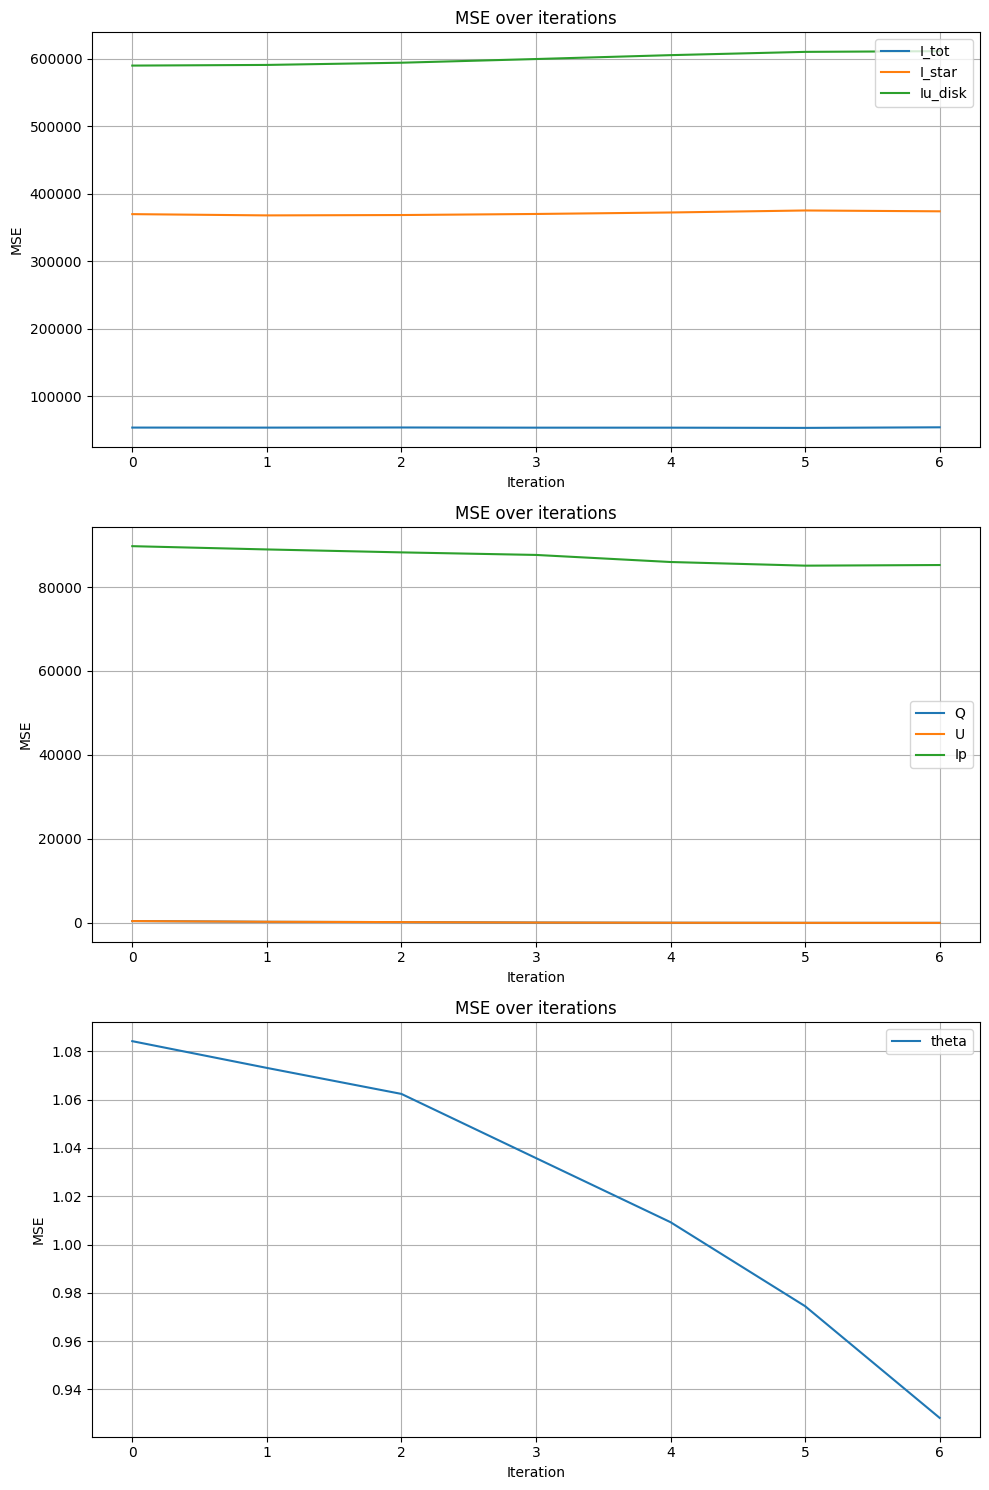

In [91]:
plot_MSE_from_file("../test_results/rhapsodie_method_results/max_iter_100/mse_list.txt")

In [212]:
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from matplotlib.colors import PowerNorm, SymLogNorm

titles = ['I_tot', 'I_star', 'I_disk', 'Q', 'U', 'Iu', 'Iu_star', 'Iu_disk', 'Ip', 'theta']

def compare_files(file1_path, file2_path, n_first):
    hdulist1 = fits.open(file1_path)
    hdulist2 = fits.open(file2_path)
    
    imgs1 = hdulist1[0].data[:n_first]
    imgs2 = hdulist2[0].data[:n_first]
    
    hdulist1.close()
    hdulist2.close()
    
    num_images = min(len(imgs1), len(imgs2))
    num_cols = 2
    num_rows = num_images
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 18))
    fig.subplots_adjust(0.1, 0.1, 0.9, 0.9, 0.015, 0.3) # Bottom, top, left, right, wspace, hspace
    for i in range(num_images):
        if titles[i] == 'Q' or titles[i] == 'U':
            norm = SymLogNorm(1, vmin=-100, vmax=100)
            cmap = 'PuOr'
        else:
            norm = PowerNorm(gamma=0.25)
            cmap = 'gist_heat'
        ax = axs[i, 0]
        ax.imshow(imgs1[i], cmap=cmap, norm=norm)
        ax.set_title(f'File 1 - {titles[i]}')
        ax.set_xticks([])
        ax.set_yticks([])
        
        
        ax = axs[i, 1]
        imshow = ax.imshow(imgs2[i], cmap=cmap, norm=norm)
        ax.set_title(f'File 2 - {titles[i]}')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar(imshow, format='%.0e')
    
    # plt.tight_layout()
    plt.show()

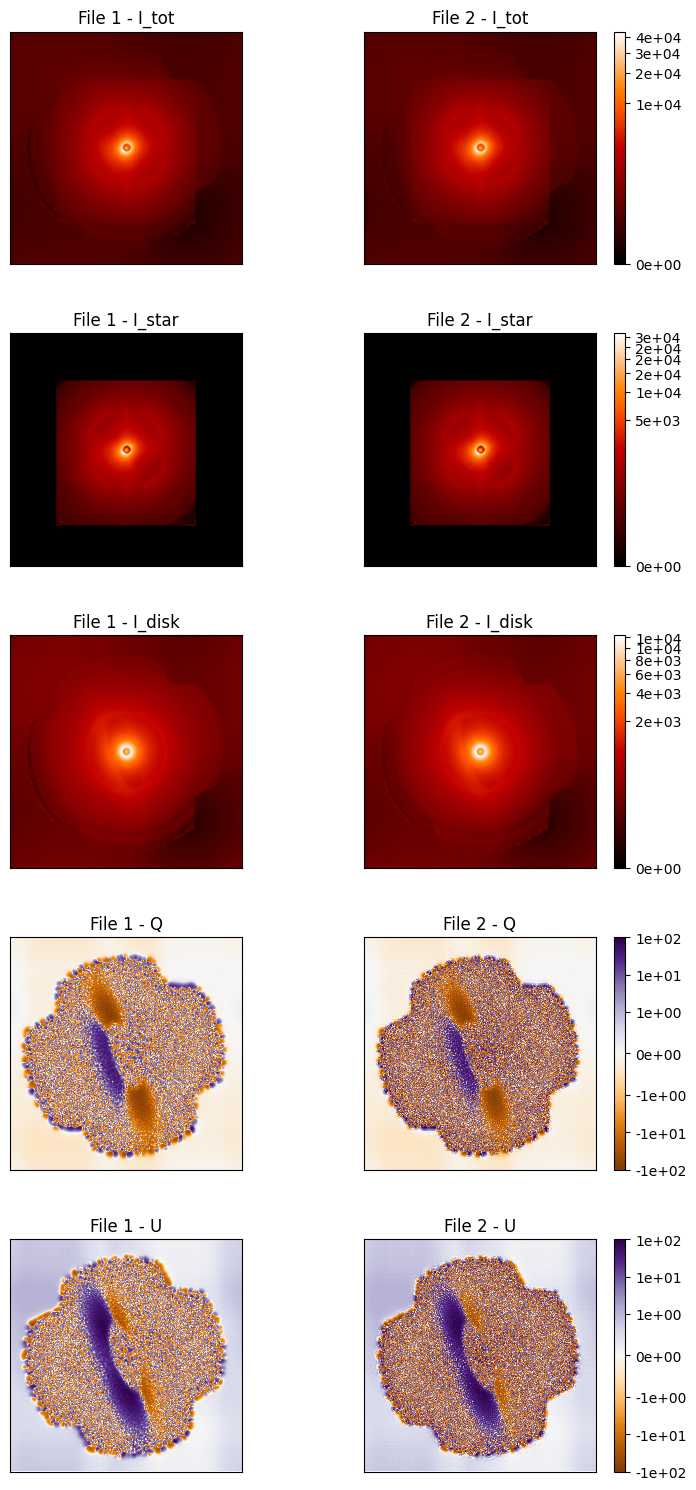

In [213]:
compare_files("../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_0.001.fits", "../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_0.0001.fits", 5)

In [214]:

import astropy.io.fits as fits
import matplotlib.pyplot as plt


def plot_fits_images(file_path, norm=None):
    hdulist = fits.open(file_path)
    imgs = hdulist[0].data
    hdulist.close()
    num_images = len(imgs)
    print(f'Number of images: {num_images}')
    fig, axs = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(num_images):
        if titles[i] == 'Q' or titles[i] == 'U':
            norm = SymLogNorm(1, vmin=-100, vmax=100)
            cmap = 'PuOr'
        else:
            norm = PowerNorm(gamma=0.25)
            cmap = 'gist_heat'
        curr_img = imgs[i]
        ax = axs[i // 5, i % 5]
        ax.imshow(curr_img, cmap=cmap, norm=norm)
        ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()

Number of images: 10


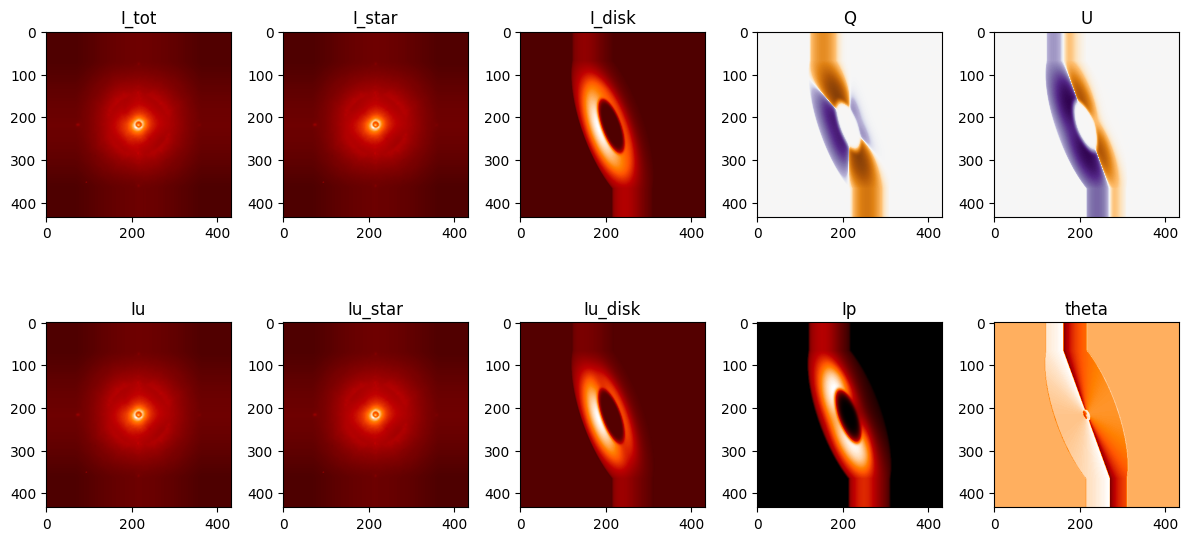

In [215]:
plot_fits_images("../test_results/TRUE.fits", norm=PowerNorm(gamma=0.25))

Number of images: 10


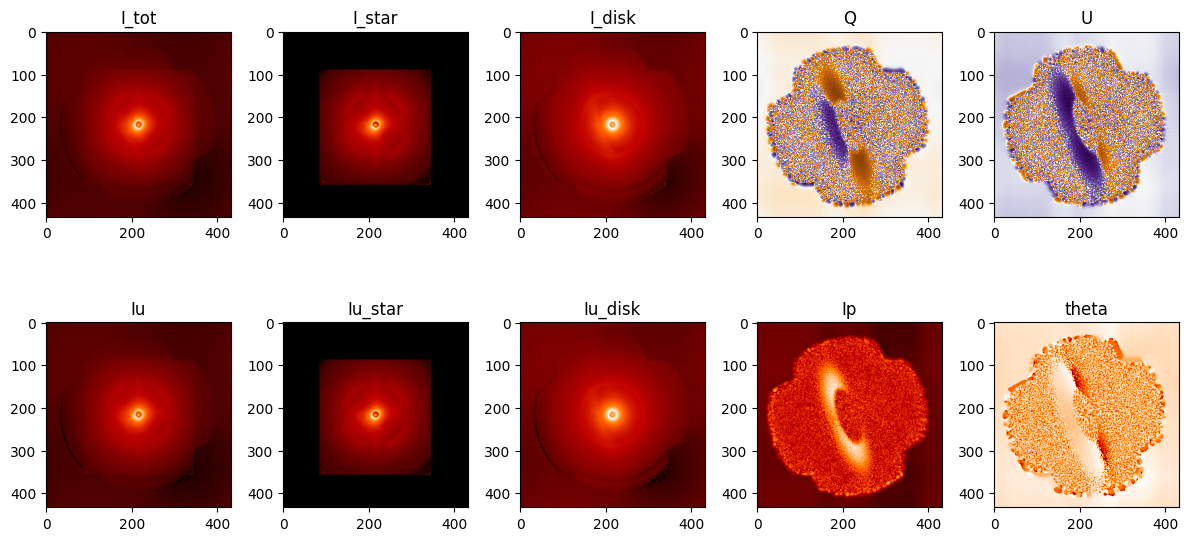

In [216]:
plot_fits_images("../test_results/rhapsodie_method_results/max_iter_100/RHAPSODIE_non_linear_results_regul_param_0.001.fits", norm=PowerNorm(gamma=0.25))